### Imports and parameters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# %matplotlib notebook

In [2]:
file = "inputs/2022-11-23-12_13_44.csv"

In [3]:
df = pd.read_csv(file)
df.head()

,FRAME,KEY,STATUS
0,143,Key.enter,DOWN
1,145,Key.enter,UP
2,243,Key.enter,DOWN
3,246,Key.enter,UP
4,346,Key.right,DOWN


### Only keep keys that are of our interest

In [4]:
df_trim = df[(df['KEY'] == 'Key.left') | (df['KEY'] == 'Key.right') | (df['KEY'] == '\'d\'')]

df_trim.loc[(df_trim['KEY'] == 'Key.right') & (df_trim['STATUS'] == 'DOWN'), 'action'] = 'R'
df_trim.loc[(df_trim['KEY'] == 'Key.right') & (df_trim['STATUS'] == 'UP'), 'action'] = 'r'

df_trim.loc[(df_trim['KEY'] == 'Key.left') & (df_trim['STATUS'] == 'DOWN'), 'action'] = 'L'
df_trim.loc[(df_trim['KEY'] == 'Key.left') & (df_trim['STATUS'] == 'UP'), 'action'] = 'l'

df_trim.loc[(df_trim['KEY'] == '\'d\'') & (df_trim['STATUS'] == 'DOWN'), 'action'] = 'J'
df_trim.loc[(df_trim['KEY'] == '\'d\'') & (df_trim['STATUS'] == 'UP'), 'action'] = 'j'

/tmp/ipykernel_797/1644764957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trim.loc[(df_trim['KEY'] == 'Key.right') & (df_trim['STATUS'] == 'DOWN'), 'action'] = 'R'


In [5]:
df_trim = df_trim[["FRAME", "action"]]
df_trim.head()

,FRAME,action
4,346,R
5,491,J
6,517,j
7,519,r
8,534,L


### Extract timeline

In [6]:
start = df_trim.FRAME.min()

# r, j, l
data = {"R": [], "L": [], "J": []}
r=0
l=0
j=0
for index, row in df_trim.iterrows():
    if row.action == "R".upper():
        data["R"].append([row.FRAME])
    if row.action == "R".lower():
        data["R"][-1].append(row.FRAME - data["R"][-1][0])
        
    if row.action == "L".upper():
        data["L"].append([row.FRAME])
    if row.action == "L".lower():
        data["L"][-1].append(row.FRAME - data["L"][-1][0])
        
    if row.action == "J".upper():
        data["J"].append([row.FRAME])
    if row.action == "J".lower():
        data["J"][-1].append(row.FRAME - data["J"][-1][0])

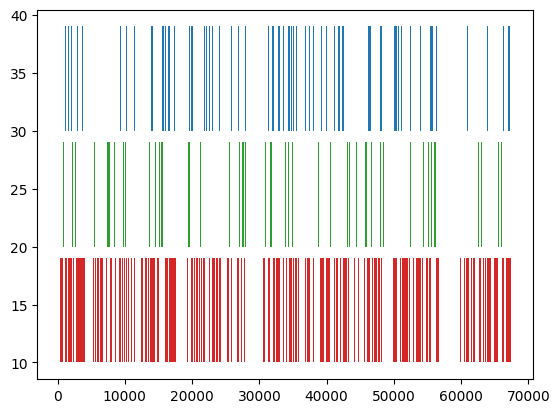

In [7]:
fig, ax = plt.subplots()
ax.broken_barh(data["R"], (10, 9), facecolors='tab:red')
ax.broken_barh(data["L"], (20, 9), facecolors='tab:green')
ax.broken_barh(data["J"], (30, 9), facecolors='tab:blue')
plt.show()

### Extract patterns

In [8]:
all_keys = ''.join(list(df_trim["action"]))
all_keys

'RJjrLlRJjrLlRJjrJLjJRljLrlLlRJjrLJjlRJjJjJjJjrLlRrLlRJjJjJjJjJjJjJjJjrLJjlRJjJjJjrRJjrLlRJjrLlLJjlRJjJjJjJjrRJjrRJjrRJjrJRjrRJjJjJjJjJjJjJjJjJjJjJjrRJjJjrRJjrRrRrRrRJjrLlJRjJjJjJjrLJjJjRlJjJjrRJjrRJjJjJjJjJjJjJjrLlLlRJjrRJjJjrLlRJjrRrLlRrRJjJjrRrRJjJjrLJlRjrRJjrLlRJjrLJjJjJjlRJjLrlJRjJjJjJjJjJjJjrLlRrLJljRrLlJjRrRrLRlJrLjlRJjJjrRrLlLlRrRJjrJRjrRrRrRrJRjJjJjJjJjrLlRJjrRJjrRJjJjrRLrlRJjrLlJjRJjJjJjJjrJLjlRrLlRJrLljRJjJjJjrJRjrRJjJjrRJjJjrLJjlJLjlLlRrJjRJrjRJrjJRjJjJjJjJjJjrLlRrLlRrRrRJjrRrRrRrRJjrRJjrLlJjLlLlJjRrJjLJjlJjRJjJjJjJjJjJjrJRjJjrRJjJjJjrLlLJjlRrRrRJjrLlRrRrRrLlJjRrRrRrJjRrJjLJljLlRrLJjlRrLlRJrjJRrjLlLlRrRJjJrjLlJLjlJjRrLlRrJRjrLlRJrjLlLlJjJjRJjJjrLlRJjJjrRrJjRrRrRJjJjJjJjrLlRJjJjJjrRJjrRJjJjrRrRrRrRrRrJjJjRrJjRrJjRrJjRrJjRrRrLlRrLJljLlRrRrRrLlRJjJjJrRjJjJjJjrJjRJjJjJjrLJjlJjRrLJljRJjrRJjJjJjJjrJjJRjrJRjJjJjrLRlrLRlrRJrjRJjrRJjrRrJjJjRrJjRrJjJjRJjJjrRJjrRrRrRrJjRrJjRJjrRJjJjrLlRrRJrjRrJRjrRrRJjJjJjJjrRrRJjJjJjJjJjrRJjJjrJjRrLlRrJRjrLlRJjJjJjLrRlrLlLlRJjrRJjJjJjrRrLlLlRJjJjrLlL

In [9]:
def getAllSubStrings(x, l=None, freq=False):
    if l == None:
        l = len(x)
    
    allSubStrings = [x[i:i+l] for i in range(0, len(x)) if len(x[i:i+l]) == l]

    if freq:
        return allSubStrings
    else:
        return set(allSubStrings)

In [10]:
def extract_freq(x, l=3, sort='value'):
    res = {}
    substrings = getAllSubStrings(all_keys, l=l, freq=True)
    for idx in substrings:
        if idx not in res.keys():
            res[idx] = 1
        else:
            res[idx] += 1
    if sort == 'key':
        return dict(sorted(res.items(), key=lambda item: item[0], reverse=False))
    elif sort == 'value':
        return dict(sorted(res.items(), key=lambda item: item[1], reverse=True))

In [11]:
all_patterns = {}
for i in range(4, 11):
    all_patterns.update(extract_freq(all_keys, l=i, sort='value'))
all_patterns = dict(sorted(all_patterns.items(), key=lambda item: item[1], reverse=True))
all_patterns

{'JjJj': 193,
 'jJjJ': 117,
 'jJjJj': 110,
 'JjJjJ': 108,
 'JjJjJj': 101,
 'RJjr': 83,
 'rRJj': 75,
 'jJjr': 70,
 'RJjJ': 69,
 'JjrR': 68,
 'JjJjr': 68,
 'RJjJj': 65,
 'jJjJjJ': 65,
 'JjrL': 64,
 'jJjJjJj': 62,
 'JjJjJjJ': 59,
 'lRJj': 56,
 'JjJjJjJj': 56,
 'jrLl': 52,
 'rLlR': 51,
 'JjrLl': 48,
 'jrRJ': 47,
 'rRrR': 46,
 'LlRJ': 45,
 'RrRr': 43,
 'rRJjr': 43,
 'jrRJj': 42,
 'RrRJ': 39,
 'JjrRJ': 39,
 'LlRJj': 38,
 'RJjrR': 38,
 'jJjJjJjJ': 38,
 'jJjJjr': 37,
 'JjrRJj': 36,
 'RJjJjJ': 35,
 'JjJjJjr': 35,
 'JjJjJjJjJ': 35,
 'jJjJjJjJj': 35,
 'LlLl': 34,
 'RJjrL': 33,
 'jrLlR': 33,
 'rLlRJ': 33,
 'lRJjr': 33,
 'rRJjJ': 32,
 'RrRJj': 32,
 'RJjJjJj': 32,
 'JjJjJjJjJj': 32,
 'jrRr': 31,
 'jJjrL': 31,
 'JjJjrL': 31,
 'rRJjJj': 31,
 'LlRr': 30,
 'JjRr': 30,
 'jJjrR': 30,
 'RJjJjr': 30,
 'RrRrR': 29,
 'JjrLlR': 29,
 'RrJj': 28,
 'JjrRr': 28,
 'JjJjrR': 28,
 'RrLl': 27,
 'rLlRJj': 27,
 'RJjrLl': 26,
 'LJjl': 25,
 'rJjR': 25,
 'RJrj': 24,
 'jrLlRJ': 24,
 'LlRJjr': 24,
 'jrRJjr': 24,
 'JjlR': 23,

### First 10 patterns

[('JjJj', 193), ('jJjJ', 117), ('jJjJj', 110), ('JjJjJ', 108), ('JjJjJj', 101), ('RJjr', 83), ('rRJj', 75), ('jJjr', 70), ('RJjJ', 69), ('JjrR', 68)]


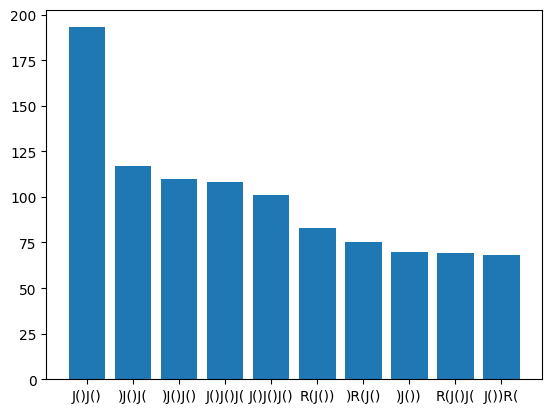

In [12]:
from itertools import islice
n_items = list(islice(all_patterns.items(), 10))
print(n_items)
keys = []
values = []
for i, (k, v) in enumerate(n_items):
    k = k.replace("J", "J(")
    k = k.replace("j", ")")
    k = k.replace("R", "R(")
    k = k.replace("r", ")")
    k = k.replace("L", "L(")
    k = k.replace("l", ")")
    keys.append(k)
    values.append(v)
    
fig, ax = plt.subplots()
ax.bar(keys, values)
plt.show()